In [2]:
#Loading dataset from various data sources(read_csv,read_json,read_excel,read_sql)
import pandas as pd

mydf = pd.read_csv("/cxldata/datasets/project/housing_short.csv")
mydf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-122.238000,37.858000,43.600000,2469.400000,388.000000,868.400000,383.800000,6.674660,369340.000000
std,0.013038,0.013038,13.501852,2603.018114,405.241286,862.336535,424.493463,1.921878,47089.733488
min,-122.250000,37.850000,21.000000,880.000000,129.000000,322.000000,126.000000,3.846200,341300.000000
25%,-122.250000,37.850000,41.000000,1274.000000,190.000000,496.000000,177.000000,5.643100,342200.000000
50%,-122.240000,37.850000,52.000000,1467.000000,235.000000,558.000000,219.000000,7.257400,352100.000000
75%,-122.230000,37.860000,52.000000,1627.000000,280.000000,565.000000,259.000000,8.301400,358500.000000
max,-122.220000,37.880000,52.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.325200,452600.000000


In [3]:
#Creating a Series - Series is a 1-D array, similar to a column in a spreadsheet
s = pd.Series([2,-1,3,5])
print(s)

#Pass pandas series as parameter to NumPy functions
import numpy as np
np.square(s)

#Arithmetic Operations
s + [1000,2000,3000,4000]

#Broadcasting
s + 1000

#Binary and conditional operations
s < 0

#Index labels - Set Manually
s2 = pd.Series([68, 83, 112, 68],
index=["alice", "bob", "charles", "darwin"])
print(s2)

#Access the items in series
print(s2[1])
print(s2["bob"])
print(s2.loc["bob"])
print(s2.iloc[1])

#Init from Python dict
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
print(s3)
s4 = pd.Series(weights, index = ["colin", "alice"])
print(s4)

#Automatic alignment
print(s2+s3)

#Init from Scalar
meaning = pd.Series(42, ["life", "universe", "everything"])
print(meaning)

#Name a Series
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
print(s6)

0    2
1   -1
2    3
3    5
dtype: int64
alice       68
bob         83
charles    112
darwin      68
dtype: int64
83
83
83
83
alice     68
bob       83
colin     86
darwin    68
dtype: int64
colin    86
alice    68
dtype: int64
alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64
life          42
universe      42
everything    42
dtype: int64
bob      83
alice    68
Name: weights, dtype: int64


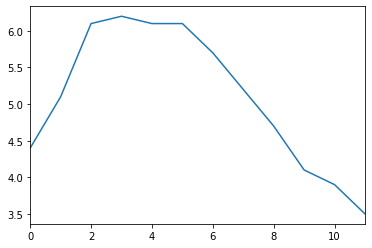

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [25]:
#DataFrame is a 2-D table, similar to a spreadsheet
#Creating DataFrame - Pass a dictionary of Series objects (series get automatically aligned based on index)

people_dict = {
"weight": pd.Series([68, 83, 112],index=["alice","bob", "charles"]),
"birthyear": pd.Series([1984, 1985, 1992],index=["bob", "alice", "charles"], name="year"),
"children": pd.Series([0, 3], index=["charles","bob"]),
"hobby": pd.Series(["Biking", "Dancing"],index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
print(people)
print(people["birthyear"])
print(people[["birthyear", "hobby"]])

#Creating DataFrame - Include columns and/or rows and guarantee order
d2 = pd.DataFrame(people_dict,columns=["birthyear", "weight", "height"],
index=["bob", "alice", "eugene"])
print(d2)

#DataFrame - Accessing rows
print(people.loc["charles"])
print(people.iloc[2])

#DataFrame - Get a slice of rows
print(people.iloc[1:3])

#DataFrame - Pass a boolean array
print(people[np.array([True, False, True])])

#DataFrame - Pass a boolean expression
print(people[people["birthyear"] < 1990])

#DataFrame - Adding and removing columns
# Adds a new column "age"
people["age"] = 2016 - people["birthyear"]

# Adds another column "over 30"
people["over 30"] = people["age"] > 30

# Removes "birthyear" and "children" columns
birthyears = people.pop("birthyear")
del people["children"]
print(people)

#DataFrame - A new column must have the same number of rows
# alice is missing, eugene is ignored
people["pets"] = pd.Series({"bob": 0,"charles": 5,"eugene":1})
print(people)

#DataFrame - Add a new column using insert method after an existing column
people.insert(1, "height", [172, 181, 185])
print(people)

#DataFrame - Add new columns using assign method
(people
 .assign(body_mass_index = lambda df:df["weight"]/(df["height"]/100) ** 2)
 .assign(overweight = lambda df:df["body_mass_index"] > 25)
)

         weight  birthyear  children    hobby
alice        68       1985       NaN   Biking
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN
alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64
         birthyear    hobby
alice         1985   Biking
bob           1984  Dancing
charles       1992      NaN
        birthyear  weight height
bob        1984.0    83.0    NaN
alice      1985.0    68.0    NaN
eugene        NaN     NaN    NaN
weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object
weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object
         weight  birthyear  children    hobby
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN
         weight  birthyear  children   hobby
alice        68       1985       NaN  Biking
charles     112       1992       0.0     NaN
       weight  birt

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,31,True,NaN,22.985398,False
bob,83,181,Dancing,32,True,0.0,25.335002,True
charles,112,185,NaN,24,False,5.0,32.724617,True


In [ ]:
#Creating Panel - Panel is a Dictionary of DataFrames
